In [66]:
import pandas as pd
df = pd.read_csv('RunningReturn/20240605.1403sh.600028.csv',index_col=0)
df

,ticker,date,close,action,reward,change_wo_short,change_w_short
0,sh.600028,2016-08-05,2.910675,1,-0.766044,NaN,NaN
1,sh.600028,2016-08-08,2.922778,1,-0.500000,1.004158,1.004158
2,sh.600028,2016-08-09,2.953034,1,-0.173648,1.010352,1.010352
3,sh.600028,2016-08-10,2.953034,1,0.173648,1.000000,1.000000
4,sh.600028,2016-08-11,2.940932,1,0.500000,0.995902,0.995902
...,...,...,...,...,...,...,...
1895,sh.600028,2024-05-29,6.620000,1,0.000000,1.004552,1.004552
1896,sh.600028,2024-05-30,6.540000,1,0.000000,0.987915,0.987915
1897,sh.600028,2024-05-31,6.450000,1,0.000000,0.986239,0.986239
1898,sh.600028,2024-06-03,6.400000,-1,0.000000,1.000000,1.007812


In [67]:
df['pctchg'] = df.close.pct_change(1)
df

,ticker,date,close,action,reward,change_wo_short,change_w_short,pctchg
0,sh.600028,2016-08-05,2.910675,1,-0.766044,NaN,NaN,NaN
1,sh.600028,2016-08-08,2.922778,1,-0.500000,1.004158,1.004158,0.004158
2,sh.600028,2016-08-09,2.953034,1,-0.173648,1.010352,1.010352,0.010352
3,sh.600028,2016-08-10,2.953034,1,0.173648,1.000000,1.000000,0.000000
4,sh.600028,2016-08-11,2.940932,1,0.500000,0.995902,0.995902,-0.004098
...,...,...,...,...,...,...,...,...
1895,sh.600028,2024-05-29,6.620000,1,0.000000,1.004552,1.004552,0.004552
1896,sh.600028,2024-05-30,6.540000,1,0.000000,0.987915,0.987915,-0.012085
1897,sh.600028,2024-05-31,6.450000,1,0.000000,0.986239,0.986239,-0.013761
1898,sh.600028,2024-06-03,6.400000,-1,0.000000,1.000000,1.007812,-0.007752


B&H:2.1747530547292584, by mean:1.0257914776059731, by median:1.0211249202173511


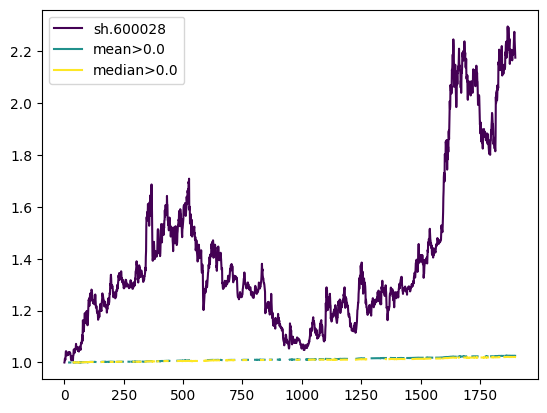

In [75]:
sdf = df
c = df.ticker.iloc[0]
eps = 0.0
ws = 20 # window size
# 策略1 underline asset
s1 = sdf.close/sdf.close.iloc[0]
# 策略2 mean>eps
s2 = (sdf.pctchg[sdf.pctchg.rolling(ws).mean()>eps]/100 + 1).cumprod()
# 策略3 median>eps
s3 = (sdf.pctchg[sdf.pctchg.rolling(ws).median()>eps]/100 + 1).cumprod()
pd.DataFrame({c:s1,"mean>"+str(eps):s2,"median>"+str(eps):s3}).plot(colormap="viridis")
print(f"B&H:{s1.iloc[-1]}, by mean:{s2.iloc[-1]}, by median:{s3.iloc[-1]}")